# Scikit Learn

### Introduction

- scikit-learn is a powerful library for machine-learning in python. 
- It provides a wide range of algorithms and tools for:
        1. classification
        2. Regression
        3. Clustering
        4. Model Evaluation

**Why scikit-learn?**<br> 
      Active Development and Community Support.<br>
      Simple to use and efficient.<br> 
      Comprehensive Set of Algorithms.<br> 
      Data preprocessing and Feature engineering.<br> 
      Model Evalution and Selection.<br> 
      Compatability with other Libraries.<br> 
      Consistent Interface<br> 
      

In [ ]:
#!pip install -U scikit-learn

### Import Necessary Libraries & Load Dataset
In this presentation we will use houseprice_data.csv dataset from Kaggle.com

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
data=pd.read_csv('Downloads/houseprice_data.csv')

In [3]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
data.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
data.shape

(21613, 19)

In [8]:
data[['price','bathrooms','floors','lat', 'long']]=data[['price','bathrooms','floors','lat', 'long']].astype(int)

In [9]:
data.dtypes

price            int64
bedrooms         int64
bathrooms        int64
sqft_living      int64
sqft_lot         int64
floors           int64
waterfront       int64
view             int64
condition        int64
grade            int64
sqft_above       int64
sqft_basement    int64
yr_built         int64
yr_renovated     int64
zipcode          int64
lat              int64
long             int64
sqft_living15    int64
sqft_lot15       int64
dtype: object

In [10]:
#checking correlations of the data.
df = pd.DataFrame(data)

In [11]:
# Compute the correlation matrix
corr = df.corr()
correlation_matrix = df.corr()
# Print the correlation between 'price' and other columns
print("Correlation with 'price':")
print(correlation_matrix['price'].sort_values(ascending=False))

Correlation with 'price':
price            1.000000
sqft_living      0.702044
grade            0.667463
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.510082
view             0.397346
sqft_basement    0.323837
bedrooms         0.308338
waterfront       0.266331
floors           0.237207
yr_renovated     0.126442
sqft_lot         0.089655
sqft_lot15       0.082456
yr_built         0.053982
condition        0.036392
long            -0.014862
zipcode         -0.053168
lat                   NaN
Name: price, dtype: float64


## **Feature Selection using Sklearn**
Feature selection is the process of selecting a subset of relevant features fro the original set of features.

Some of Feature Selection Algorithms present in Sklearn.

#### 1. RFE (Recursive Feature Elimination)
This is a backward selection algorithm that recursively removes the least important feature based on model's cofficient.

**assuming you have x_train and y_train are training data**<br>
```python
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#define model
model=LinearRegression()
rfe=RFE(model, n_features_to_select=0)
x_train_rfe.fit_transform(x_train, y_train)
```

### 2. SelectBest
Selects the top k features based on univariate  statistical test like ANOVA for classification and correlation for regressio.
```python
from sklearn.feature_selection import SelectBest, f_regression
k_best = SelectBest(score_func=f_regression, k=0)
x_train_k_best=k_best.fit_transform(x_train, y_train)
```

### 3. SelectFromModel
allows  you to use features importance from a base model to select the most importance features.

```python
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
#load model
model=RandomForestRegressor()
sfm=SelectFromModel(model, threshold='median')
x_train_sfm =sfm.fit_transform(x_train, y_train)
```

### 4. Variance Threhold
Removes features with low variance assuming that low variance features contain less information
```python
from sklearn.feature_selection import VarianceThreshold
vt= VarianceThreshold(threshold=0.1)
x_train_vt=vt.fit_transform(x_train)

## Supervised Learning Algorithms
Here we will take into consideration on the following algorithms and how they are used in Sklearn library.<br>
- Linear Models(Linear Regression and Logistic Regression)
- Support Vector Machines
- Nearest Neighbors(kNN)
- Decision Tree
- Ensemble Methods(Random Forest, Gradient Boosting)
- Naive bayes
- Neural Networks(MLPClassifiers and MLPRegressor)


### Linear regression and Logistic Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [13]:
X=data.drop('price', axis=1)
y=data['price']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standaedize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# load  model
model =LinearRegression()

In [17]:
# Select Top features using RFE model
num_top_features=10
rfe=RFE(model, n_features_to_select=num_top_features)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe =rfe.transform(X_test_scaled)

In [18]:
# Train the model on selected features
model.fit(X_train_rfe, y_train)

LinearRegression()

In [19]:
#get selected feature indices
selected_feature_indices=rfe.support_
select_feature_names=X.columns[selected_feature_indices]

In [20]:
print("Selected Feature:")
print(select_feature_names)

Selected Feature:
Index(['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15'],
      dtype='object')


In [21]:
# feature_rankings=rfe.ranking_
# print(feature_rankings)

In [22]:
# # Make prediction
# predictions = model.predict(X_test_rfe)


In [23]:
# # Evaluate the Model
# mse=mean_squared_error(y_test, predictions)
# r2=r2_score(y_test, predictions)

In [24]:
# print("Mean Squared Error (MSE):", mse)
# print("R-squared (R2):", r2)

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
threshold=data['price'].median()#creating a binary target variable on threshold
data['expensive']=(data['price']>threshold).astype(int)


In [27]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,expensive
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47,-122,1340,5650,0
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47,-122,1690,7639,1
2,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47,-122,2720,8062,0
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47,-122,1360,5000,1
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47,-122,1800,7503,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47,-122,1530,1509,0
21609,400000,4,2,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47,-122,1830,7200,0
21610,402101,2,0,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47,-122,1020,2007,0
21611,400000,3,2,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47,-122,1410,1287,0


In [28]:
x=data.drop(['price','expensive'],axis=1)
y=data['expensive']

In [29]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Standaedize the features
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
logistic_model=LogisticRegression(random_state=42)

In [32]:
# Train the model
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [33]:
# Make Prediction
predictions= logistic_model.predict(X_test_scaled)

In [34]:
# Evaluate the Model
accuracy=accuracy_score(y_test, predictions)
classification_rep=classification_report(y_test, predictions)

#print Output
print(accuracy)
print(classification_rep)

0.7934304880869766
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      2136
           1       0.82      0.76      0.79      2187

    accuracy                           0.79      4323
   macro avg       0.79      0.79      0.79      4323
weighted avg       0.80      0.79      0.79      4323



### KNN
KNN is a non-parametric learning algorithm used for both classifiaction and regression tasks.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn_model=KNeighborsClassifier(n_neighbors=5)

In [37]:
# Train model and make predictions
knn_model.fit(X_train_scaled, y_train)
predictions = knn_model.predict(X_test_scaled)

In [38]:
# Evaluate the model
accuracy=accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

In [39]:
print(accuracy)

0.8061531343974092


In [40]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2136
           1       0.82      0.79      0.81      2187

    accuracy                           0.81      4323
   macro avg       0.81      0.81      0.81      4323
weighted avg       0.81      0.81      0.81      4323



In [41]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,expensive
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47,-122,1340,5650,0
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47,-122,1690,7639,1
2,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47,-122,2720,8062,0
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47,-122,1360,5000,1
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47,-122,1800,7503,1


In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

/tmp/ipykernel_13713/3518078781.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


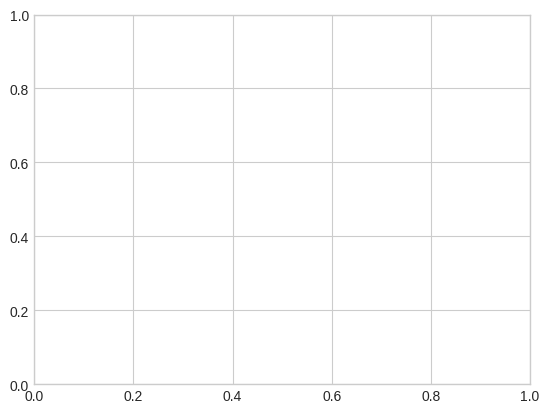

In [43]:
fig = plt.figure()
ax = plt.axes()

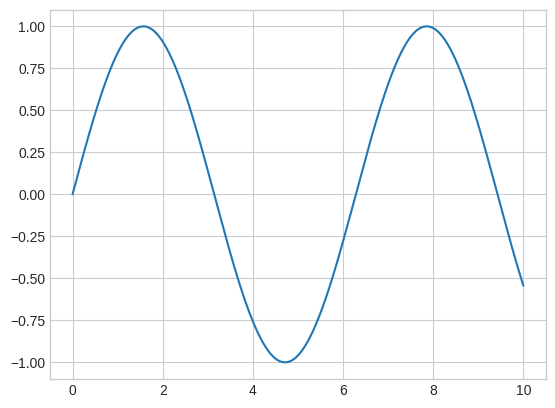

In [44]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

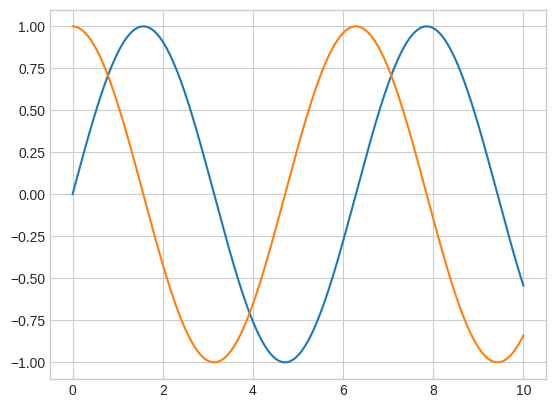

In [45]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

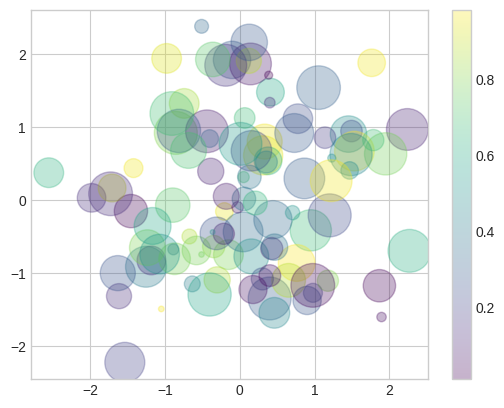

In [46]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

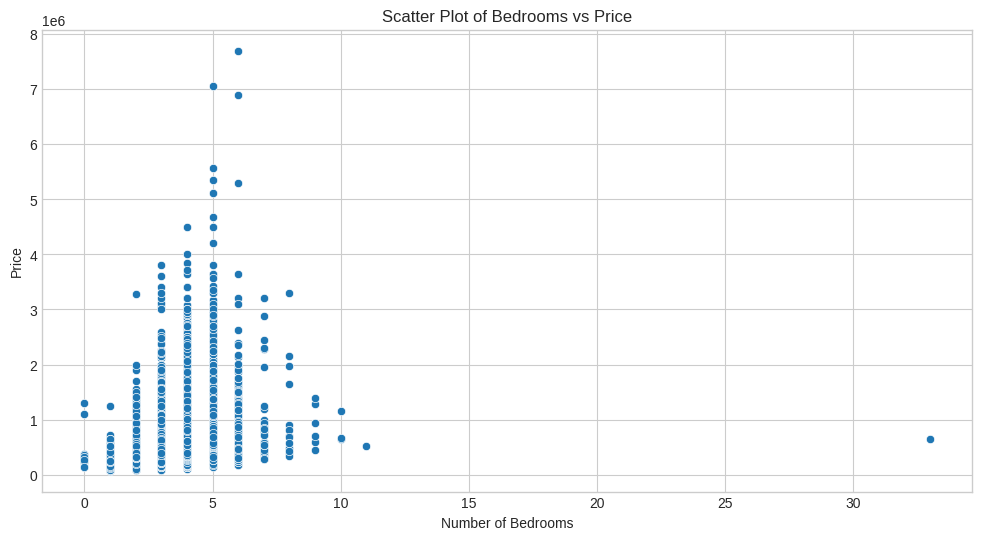

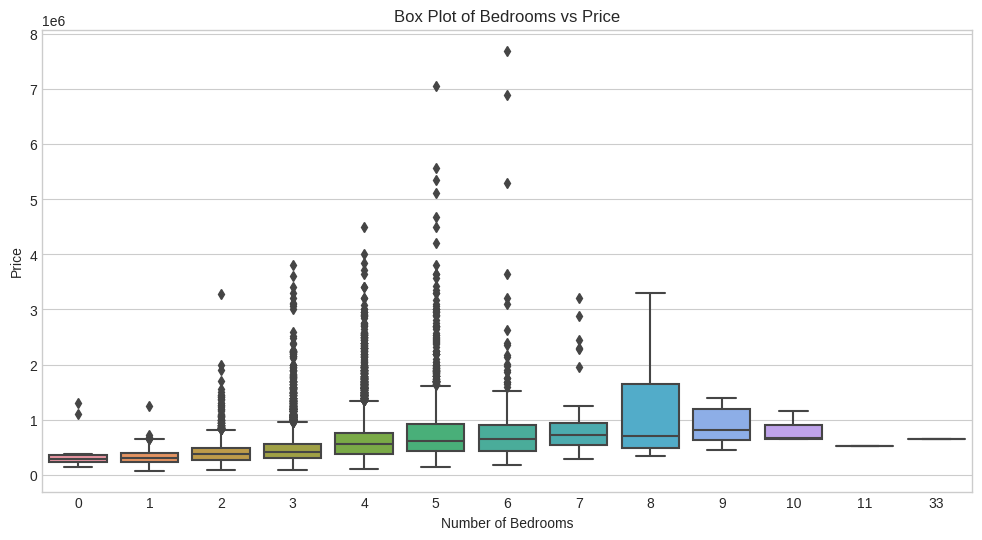

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a DataFrame named 'df'
# df = ...

# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='bedrooms', y='price', data=data)
plt.title('Scatter Plot of Bedrooms vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='price', data=data)
plt.title('Box Plot of Bedrooms vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

In [48]:
data['bedrooms'].min()

0

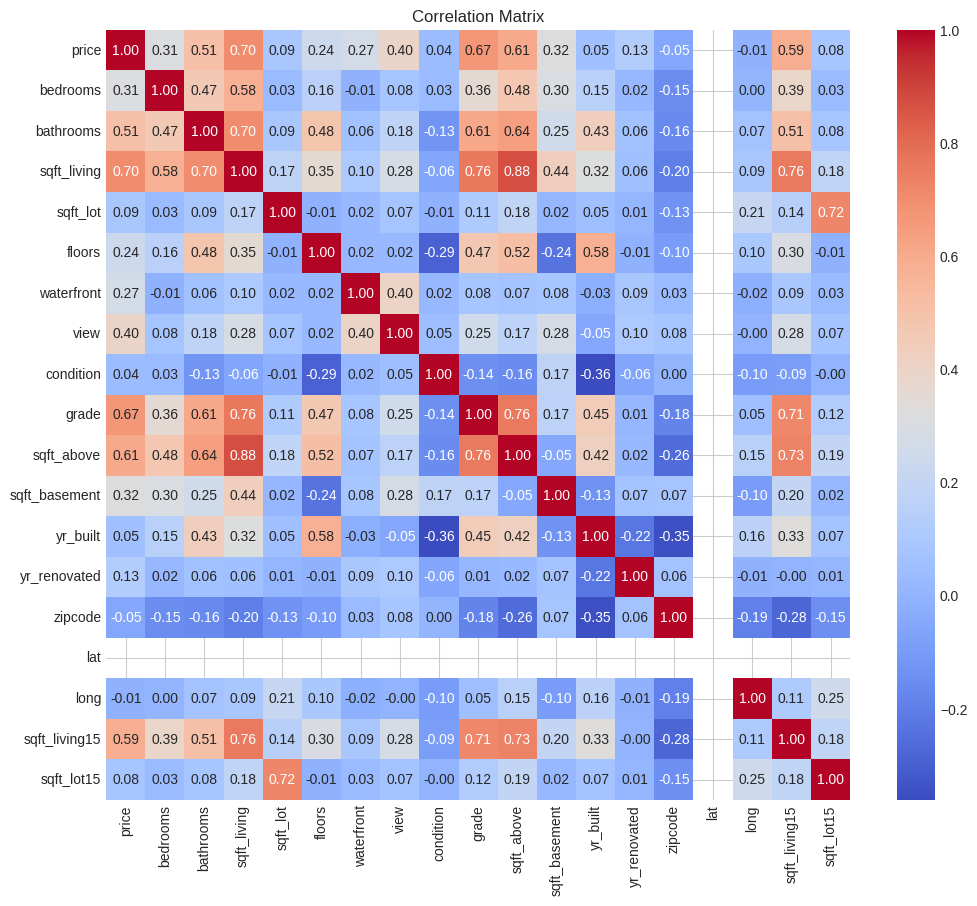

price            1.000000
sqft_living      0.702044
grade            0.667463
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.510082
view             0.397346
sqft_basement    0.323837
bedrooms         0.308338
waterfront       0.266331
floors           0.237207
yr_renovated     0.126442
sqft_lot         0.089655
sqft_lot15       0.082456
yr_built         0.053982
condition        0.036392
long            -0.014862
zipcode         -0.053168
lat                   NaN
Name: price, dtype: float64


In [49]:
# Assuming your dataset is stored in a DataFrame named 'df'
# df = ...

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Print correlation values with respect to the target variable (price)
print(correlation_matrix['price'].sort_values(ascending=False))


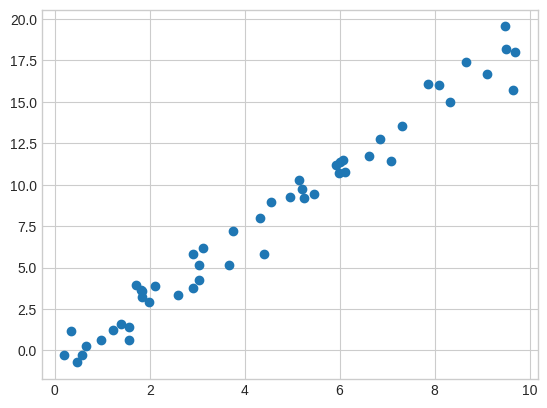

In [56]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);
